In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

In [63]:
# Prepare CSV file
filepath = 'nvida-historical-data.csv'
df = pd.read_csv(filepath)

In [64]:
# Data clean up
df['Close/Last'] = df['Close/Last'].replace({'\$': ''}, regex=True).astype(float)
df['Open'] = df['Open'].replace({'\$': ''}, regex=True).astype(float)
df['High'] = df['High'].replace({'\$': ''}, regex=True).astype(float)
df['Low'] = df['Low'].replace({'\$': ''}, regex=True).astype(float)

In [65]:
def data_quality_report(df):
    report = {}

    # Categorical features
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    report['Categorical Features'] = {}
    
    for col in categorical_columns:
        report['Categorical Features'][col] = {
            'Unique Values': df[col].nunique(),
            'Missing Values': df[col].isnull().sum(),
            'Most Frequent Value': df[col].mode()[0],
            'Most Frequent Value Count': df[col].value_counts().max()
        }

    # Continuous features
    continuous_columns = df.select_dtypes(include=[np.number]).columns
    report['Continuous Features'] = {}
    
    for col in continuous_columns:
        report['Continuous Features'][col] = {
            'Mean': df[col].mean(),
            'Median': df[col].median(),
            'Standard Deviation': df[col].std(),
            'Minimum': df[col].min(),
            'Maximum': df[col].max(),
            'Missing Values': df[col].isnull().sum()
        }

    return report

In [66]:
report = data_quality_report(df)

In [67]:
for feature_type, features in report.items():
    print(f"\n{feature_type}:\n")
    for feature, stats in features.items():
        print(f"  {feature}:")
        for stat, value in stats.items():
            print(f"    {stat}: {value}")


Categorical Features:

  Date:
    Unique Values: 2517
    Missing Values: 0
    Most Frequent Value: 01/02/2015
    Most Frequent Value Count: 1

Continuous Features:

  Close/Last:
    Mean: 17.031691656734207
    Median: 6.1883
    Standard Deviation: 25.838740679970442
    Minimum: 0.4196
    Maximum: 135.58
    Missing Values: 0
  Volume:
    Mean: 467196589.63051254
    Median: 415380400.0
    Standard Deviation: 252617500.69967353
    Minimum: 45645120
    Maximum: 3688131600
    Missing Values: 0
  Open:
    Mean: 17.029359435836312
    Median: 6.1948
    Standard Deviation: 25.861475057378392
    Minimum: 0.4233
    Maximum: 139.8
    Missing Values: 0
  High:
    Mean: 17.349991855383394
    Median: 6.2695
    Standard Deviation: 26.368511800560057
    Minimum: 0.4325
    Maximum: 140.76
    Missing Values: 0
  Low:
    Mean: 16.683529479539136
    Median: 6.0972
    Standard Deviation: 25.273699049343342
    Minimum: 0.4193
    Maximum: 132.42
    Missing Values: 0


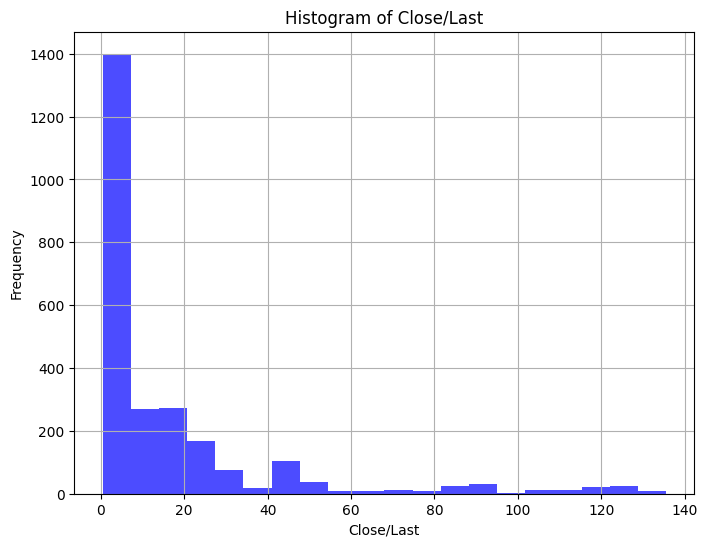

The probable distribution for Close/Last is: Skewed Right (Unimodal)



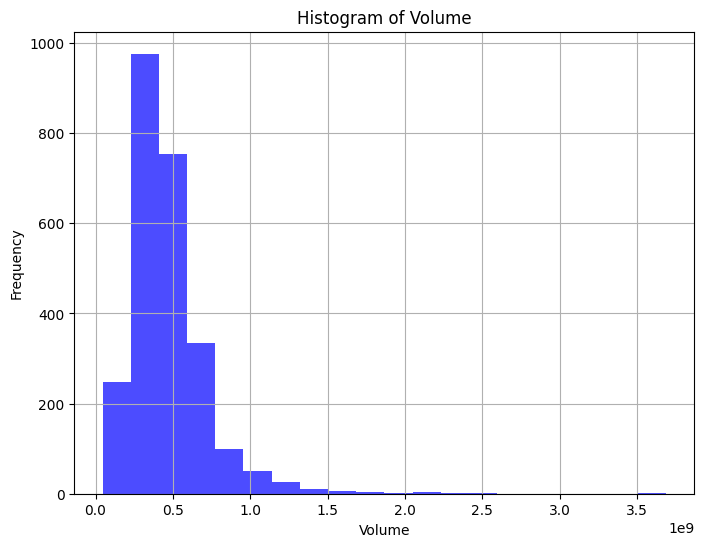

The probable distribution for Volume is: Skewed Right (Unimodal)



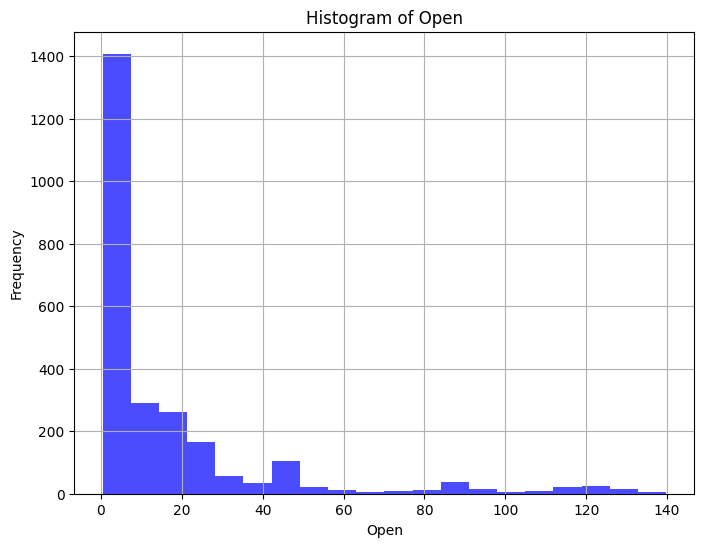

The probable distribution for Open is: Skewed Right (Unimodal)



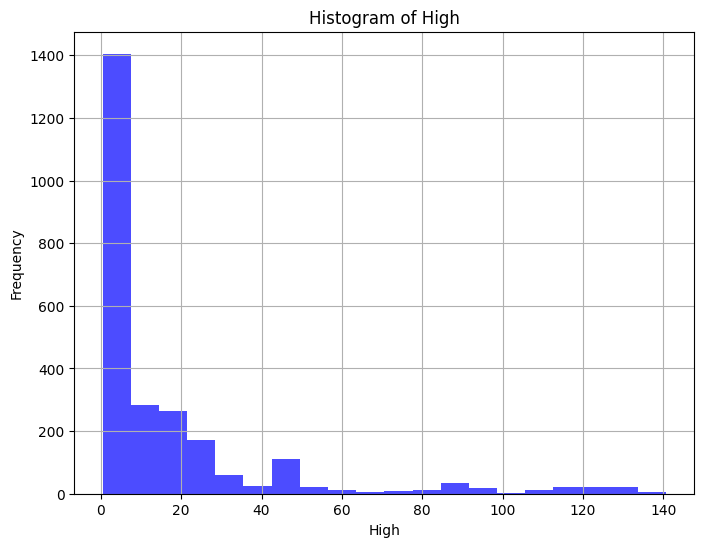

The probable distribution for High is: Skewed Right (Unimodal)



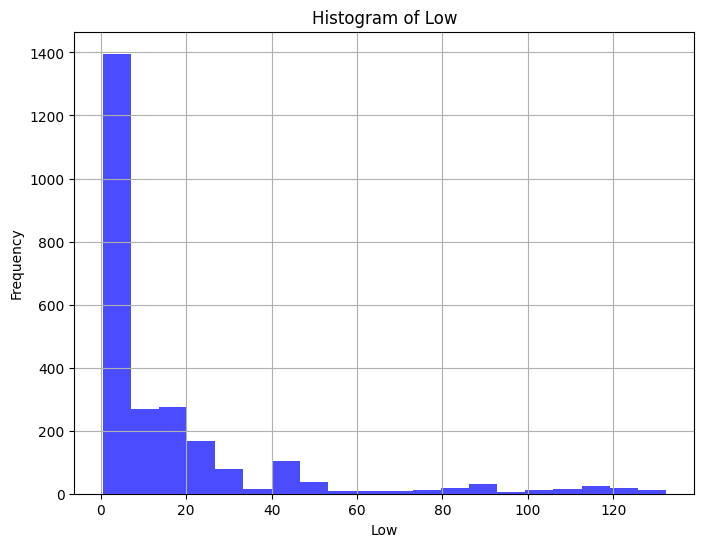

The probable distribution for Low is: Skewed Right (Unimodal)



In [68]:
def get_distribution_type(data):
    skewness = skew(data)
    if abs(skewness) < 0.5:
        return 'Normal (Unimodal)'
    elif skewness > 0.5:
        return 'Skewed Right (Unimodal)'
    elif skewness < -0.5:
        return 'Skewed Left (Unimodal)'
    else:
        return 'Unknown distribution'

# Generate histograms and classify distributions
def plot_histograms_and_classify(df):
    continuous_columns = df.select_dtypes(include=[np.number]).columns
    for col in continuous_columns:
        plt.figure(figsize=(8, 6))
        plt.hist(df[col], bins=20, color='blue', alpha=0.7)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

        distribution = get_distribution_type(df[col].dropna())
        print(f"The probable distribution for {col} is: {distribution}\n")

plot_histograms_and_classify(df)

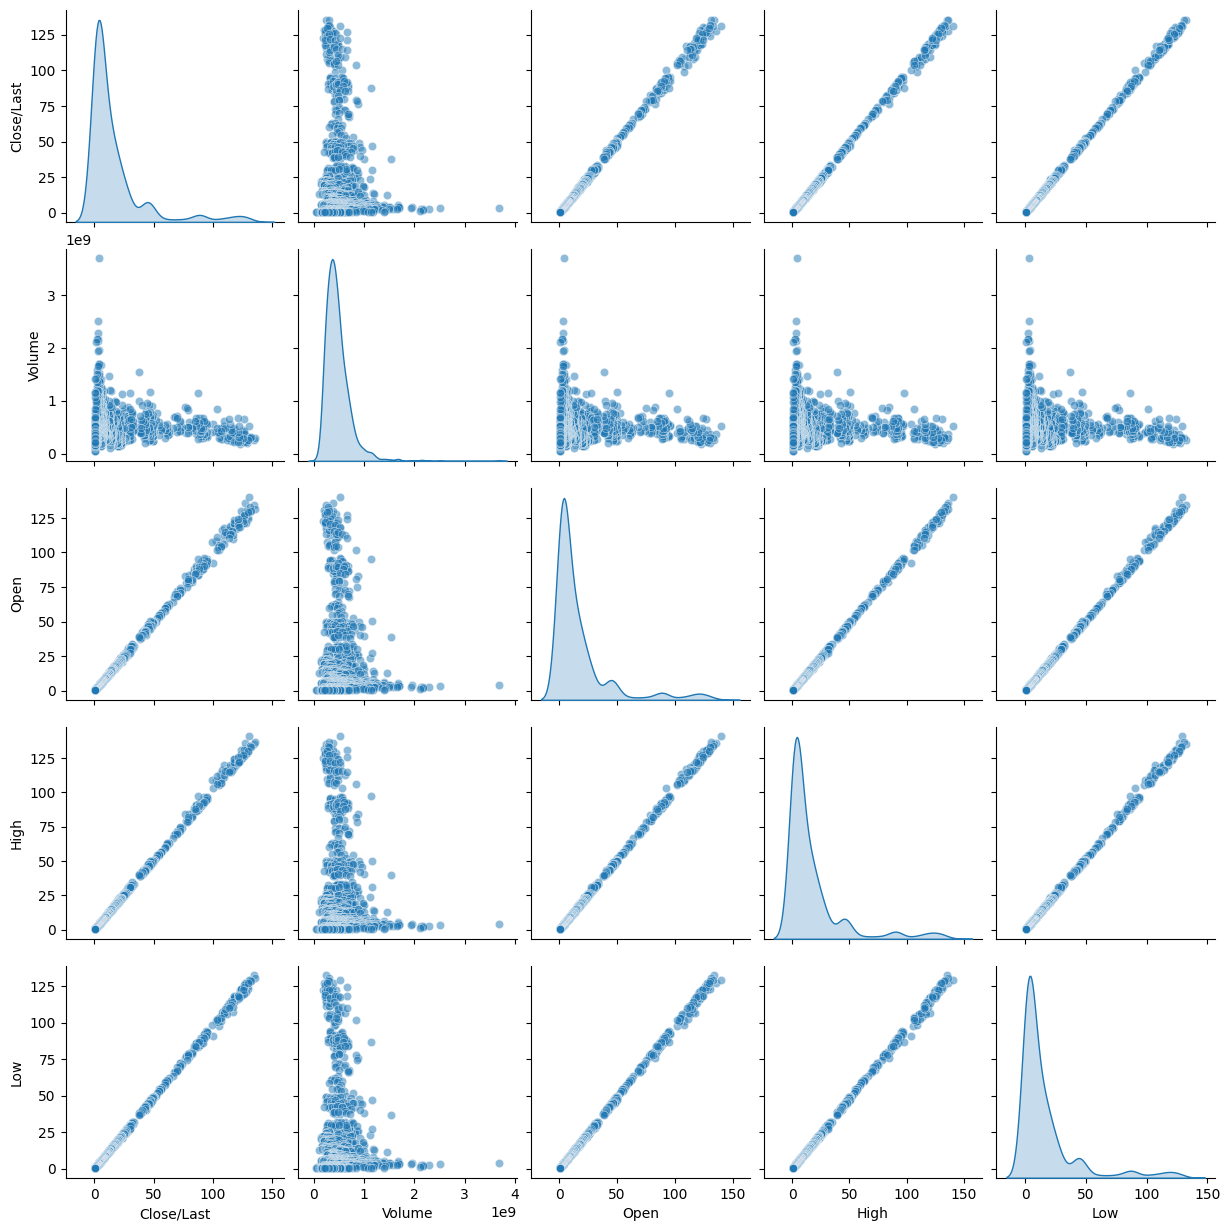

In [69]:
continuous_features = ['Close/Last', 'Volume', 'Open', 'High', 'Low']
sns.pairplot(df[continuous_features], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

C:\Users\owens\AppData\Local\Temp\ipykernel_21420\2603466567.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='DayOfWeek', y='Volume', data=df, estimator=sum, ci=None)


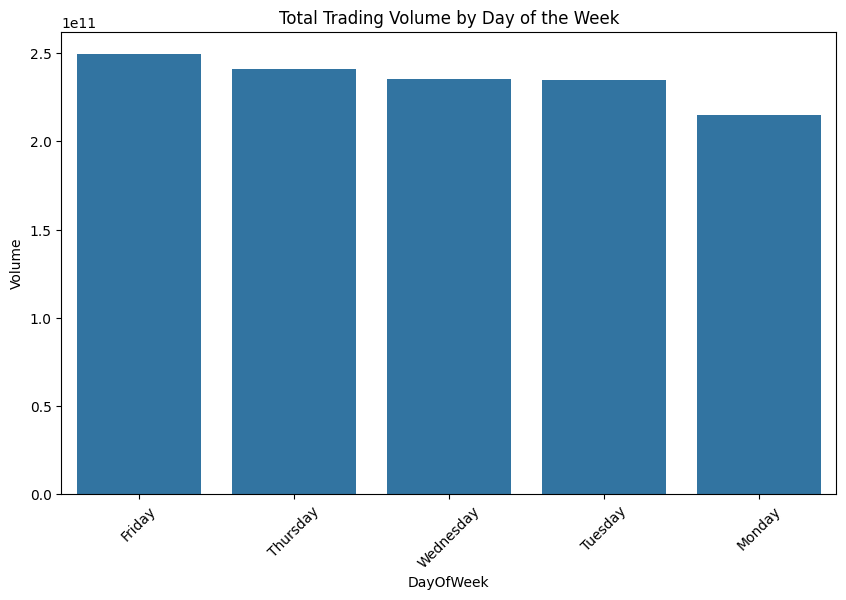

In [70]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract Day of the Week as a categorical feature
df['DayOfWeek'] = df['Date'].dt.day_name()

# Create a barplot for Volume by Day of the Week
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='Volume', data=df, estimator=sum, ci=None)
plt.title('Total Trading Volume by Day of the Week')
plt.xticks(rotation=45)
plt.show()

C:\Users\owens\AppData\Local\Temp\ipykernel_21420\3306534297.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Month', y='Close/Last', data=df, estimator=np.mean, ci=None)


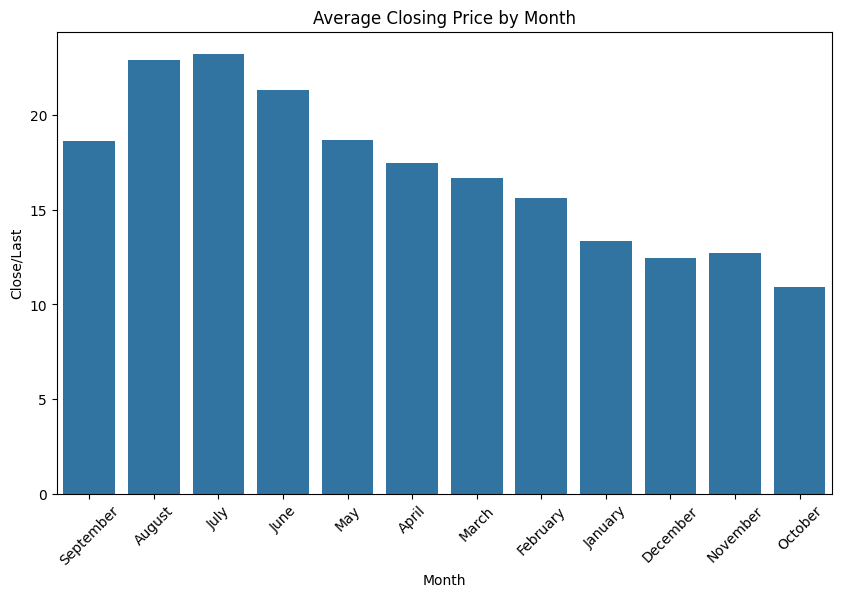

In [71]:
# Extract Month as a categorical feature
df['Month'] = df['Date'].dt.month_name()

# Create a barplot for Average Close/Last price by Month
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Close/Last', data=df, estimator=np.mean, ci=None)
plt.title('Average Closing Price by Month')
plt.xticks(rotation=45)
plt.show()

C:\Users\owens\AppData\Local\Temp\ipykernel_21420\2422943112.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  volume_by_day_and_price = df.groupby(['DayOfWeek', 'PriceRange'])['Volume'].sum().unstack()


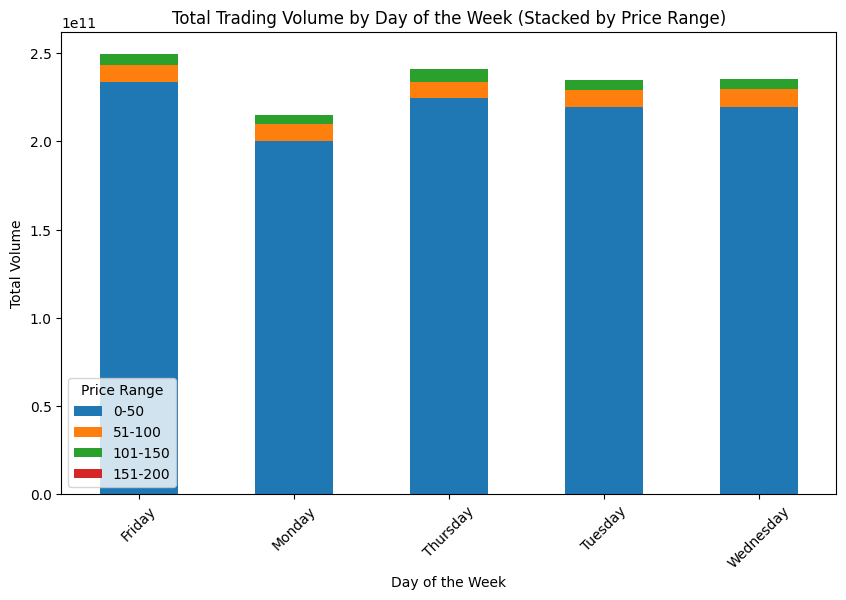

In [72]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract Day of the Week as a categorical feature
df['DayOfWeek'] = df['Date'].dt.day_name()

# Create a new categorical feature based on the Close/Last price
# You can create price ranges (bins) to categorize the continuous Close/Last feature
price_bins = [0, 50, 100, 150, 200]
price_labels = ['0-50', '51-100', '101-150', '151-200']
df['PriceRange'] = pd.cut(df['Close/Last'], bins=price_bins, labels=price_labels)

# Create a stacked barplot for Volume by Day of the Week and stacked by PriceRange
volume_by_day_and_price = df.groupby(['DayOfWeek', 'PriceRange'])['Volume'].sum().unstack()

# Plotting the stacked barplot
volume_by_day_and_price.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Total Trading Volume by Day of the Week (Stacked by Price Range)')
plt.xlabel('Day of the Week')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.legend(title='Price Range')
plt.show()

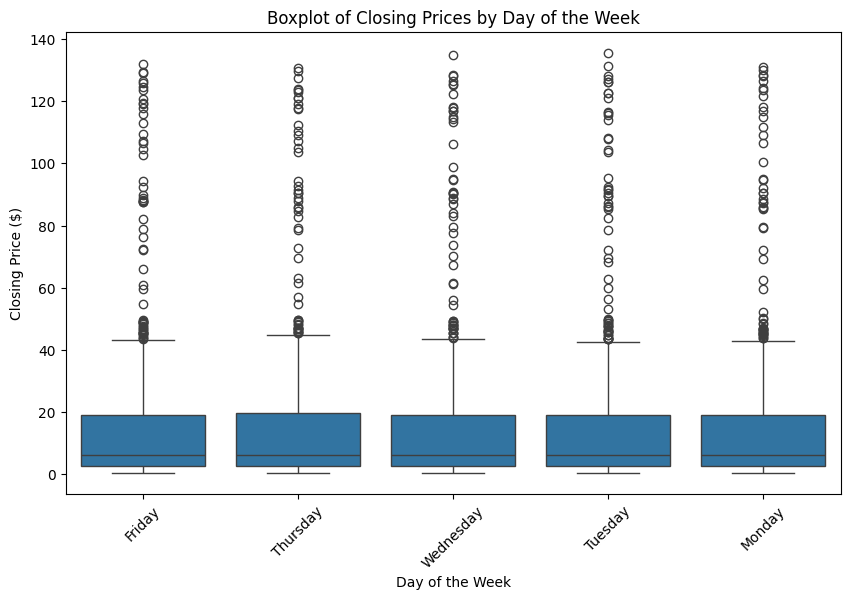

In [73]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract Day of the Week as a categorical feature
df['DayOfWeek'] = df['Date'].dt.day_name()

# Create a boxplot of Close/Last price by Day of the Week
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='Close/Last', data=df)
plt.title('Boxplot of Closing Prices by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Closing Price ($)')
plt.xticks(rotation=45)
plt.show()

In [74]:


# Select continuous features for the covariance matrix
continuous_features = ['Close/Last', 'Volume', 'Open', 'High', 'Low']

# Construct the covariance matrix
cov_matrix = df[continuous_features].cov()

# Print the covariance matrix
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
              Close/Last        Volume          Open          High  \
Close/Last  6.676405e+02 -2.717345e+08  6.678506e+02  6.811328e+02   
Volume     -2.717345e+08  6.381560e+16 -2.675637e+08 -2.585401e+08   
Open        6.678506e+02 -2.675637e+08  6.688159e+02  6.818036e+02   
High        6.811328e+02 -2.585401e+08  6.818036e+02  6.952984e+02   
Low         6.529092e+02 -2.800415e+08  6.534324e+02  6.662445e+02   

                     Low  
Close/Last  6.529092e+02  
Volume     -2.800415e+08  
Open        6.534324e+02  
High        6.662445e+02  
Low         6.387599e+02  


In [75]:
corr_matrix = df[continuous_features].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
            Close/Last    Volume      Open      High       Low
Close/Last    1.000000 -0.041630  0.999435  0.999712  0.999799
Volume       -0.041630  1.000000 -0.040955 -0.038813 -0.043862
Open          0.999435 -0.040955  1.000000  0.999817  0.999720
High          0.999712 -0.038813  0.999817  1.000000  0.999722
Low           0.999799 -0.043862  0.999720  0.999722  1.000000


In [76]:
scaler = MinMaxScaler()

# Perform normalization
df_normalized = df.copy()
df_normalized[continuous_features] = scaler.fit_transform(df[continuous_features])

# Display the original and normalized values for the first few rows
print("Before Normalization:")
print(df[continuous_features].head())

print("\nAfter Normalization:")
print(df_normalized[continuous_features].head())

Before Normalization:
   Close/Last     Volume    Open      High       Low
0      116.00  382462400  117.06  118.6181  115.3901
1      117.87  293506400  117.35  119.6600  117.2500
2      113.37  310318900  115.89  117.7000  113.2200
3      115.59  231925900  118.17  118.8000  114.8300
4      116.78  248772300  116.79  118.1800  114.3600

After Normalization:
   Close/Last    Volume      Open      High       Low
0    0.855135  0.092469  0.836845  0.842213  0.870986
1    0.868970  0.068047  0.838926  0.849637  0.885076
2    0.835677  0.072663  0.828451  0.835670  0.854546
3    0.852102  0.051141  0.844809  0.843509  0.866743
4    0.860906  0.055766  0.834908  0.839091  0.863183


In [77]:
df['Close/Last'] = df['Close/Last'].replace({'\$': ''}, regex=True).astype(float)

# Equal-width binning for 'Close/Last'
# Define the number of bins (e.g., 4 bins)
df['Close/Last_Binned_Equal_Width'] = pd.cut(df['Close/Last'], bins=4, labels=["Low", "Medium", "High", "Very High"])

# Equal-frequency binning for 'Volume'
# Define the number of bins (e.g., 4 bins)
df['Volume_Binned_Equal_Frequency'] = pd.qcut(df['Volume'], q=4, labels=["Low", "Medium", "High", "Very High"])

# Display the original and binned values for the first few rows
print("Original and Equal-width Binned 'Close/Last':")
print(df[['Close/Last', 'Close/Last_Binned_Equal_Width']].head())

print("\nOriginal and Equal-frequency Binned 'Volume':")
print(df[['Volume', 'Volume_Binned_Equal_Frequency']].head())

Original and Equal-width Binned 'Close/Last':
   Close/Last Close/Last_Binned_Equal_Width
0      116.00                     Very High
1      117.87                     Very High
2      113.37                     Very High
3      115.59                     Very High
4      116.78                     Very High

Original and Equal-frequency Binned 'Volume':
      Volume Volume_Binned_Equal_Frequency
0  382462400                        Medium
1  293506400                           Low
2  310318900                        Medium
3  231925900                           Low
4  248772300                           Low


In [78]:
# Assuming 'PriceChange' is the target variable (Increase or Decrease)
df['PriceChange'] = df['Close/Last'].diff().fillna(0).apply(lambda x: 'Increase' if x > 0 else 'Decrease')

# Check class distribution
class_distribution = df['PriceChange'].value_counts()
print(class_distribution)

PriceChange
Decrease    1373
Increase    1144
Name: count, dtype: int64
